In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import requests
import os
from io import BytesIO
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image

In [ ]:
from urllib.parse import urlparse

# Function to validate URLs
def is_valid_url(url):
    parsed = urlparse(url)
    return all([parsed.scheme, parsed.netloc])


In [ ]:
data = pd.read_excel("/Marine_litter.xlsx")


In [114]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add labels (0 for No Litter, 1 for Litter) based on Litter Type
# For this example, let's assume 'Plastic', 'Metal', 'Glass', 'Organic' are litter
data['Label'] = data['Litter Type'].apply(lambda x: "Litter" if x in ['Plastic', 'Metal', 'Glass', 'Organic'] else "Non_Litter")

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.7, random_state=42)

# Save training and testing sets
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [117]:
# Create a directory to save the images
os.makedirs('images', exist_ok=True)

# Download and save images
for index, row in data.iterrows():
    url = row['Image URL']
    if is_valid_url(url):
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise HTTPError for bad responses
            img = Image.open(BytesIO(response.content))
            subfolder = str(row['Label'])
            img_path_fld=os.path.join(subfolder,f"{row['ID']}.jpg")
            img_path = os.path.join('images',subfolder, f"{row['ID']}.jpg")
            # Convert the image to RGB mode before saving as JPEG
            img = img.convert('RGB')  # Add this line to convert to RGB
            img.save(img_path)
            data.at[index, 'Image Path'] = img_path
            data.at[index, 'Image_folder_path'] = img_path_fld
        except requests.exceptions.RequestException as e:
            print(f"Error downloading {url}: {e}")
    else:
        print(f"Invalid URL: {url}")

# Save the updated dataset with image paths
data.to_csv('image_data_with_paths.csv', index=False)

In [118]:
data

,ID,Date,Location,Litter Type,Source,Image URL,Label,Image Path,Image_folder_path
0,1,2024-01-01,"48.8566 N, 2.3522 E",Moss,NOAA,https://thumbs.dreamstime.com/z/fish-caught-pl...,Non_Litter,images/Non_Litter/1.jpg,Non_Litter/1.jpg
1,2,2024-01-02,"34.0522 N, 118.2437 W",Plastic,OpenLitterMap,https://i.guim.co.uk/img/media/f5108293ddff6c1...,Litter,images/Litter/2.jpg,Litter/2.jpg
2,3,2024-01-03,"35.6895 N, 139.6917 E",Seaweed,NOAA,https://www.treehugger.com/thmb/Bm2hStWmhnXUZH...,Non_Litter,images/Non_Litter/3.jpg,Non_Litter/3.jpg
3,4,2024-01-04,"35.6895 N, 139.6917 E",Glass,NOAA,https://www.rubicon.com/wp-content/uploads/202...,Litter,images/Litter/4.jpg,Litter/4.jpg
4,5,2024-01-05,"35.6895 N, 139.6917 E",Moss,EEA,https://encrypted-tbn0.gstatic.com/images?q=tb...,Non_Litter,images/Non_Litter/5.jpg,Non_Litter/5.jpg
5,6,2024-01-06,"40.7128 N, 74.0060 W",Seaweed,NOAA,https://encrypted-tbn0.gstatic.com/images?q=tb...,Non_Litter,images/Non_Litter/6.jpg,Non_Litter/6.jpg
6,7,2024-01-07,"35.6895 N, 139.6917 E",Moss,EEA,https://encrypted-tbn0.gstatic.com/images?q=tb...,Non_Litter,images/Non_Litter/7.jpg,Non_Litter/7.jpg
7,30,2024-01-30,"35.6895 N, 139.6917 E",Fish,NOAA,https://encrypted-tbn0.gstatic.com/images?q=tb...,Non_Litter,images/Non_Litter/30.jpg,Non_Litter/30.jpg
8,8,2024-01-08,"51.5074 N, 0.1278 W",Plastic,OpenLitterMap,https://veganista.co/wp-content/uploads/2019/0...,Litter,images/Litter/8.jpg,Litter/8.jpg
9,9,2024-01-09,"48.8566 N, 2.3522 E",Glass,OpenLitterMap,https://c8.alamy.com/comp/2G214H8/glass-water-...,Litter,images/Litter/9.jpg,Litter/9.jpg


In [119]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Add labels (0 for No Litter, 1 for Litter) based on Litter Type
# For this example, let's assume 'Plastic', 'Metal', 'Glass', 'Organic' are litter
data['Label'] = data['Litter Type'].apply(lambda x: "Litter" if x in ['Plastic', 'Metal', 'Glass', 'Organic'] else "Non_Litter")
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.7, random_state=42)

# Save training and testing sets
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [131]:
train_data

,ID,Date,Location,Litter Type,Source,Image URL,Label,Image Path,Image_folder_path
4,5,2024-01-05,"35.6895 N, 139.6917 E",Moss,EEA,https://encrypted-tbn0.gstatic.com/images?q=tb...,Non_Litter,images/Non_Litter/5.jpg,Non_Litter/5.jpg
3,4,2024-01-04,"35.6895 N, 139.6917 E",Glass,NOAA,https://www.rubicon.com/wp-content/uploads/202...,Litter,images/Litter/4.jpg,Litter/4.jpg
6,7,2024-01-07,"35.6895 N, 139.6917 E",Moss,EEA,https://encrypted-tbn0.gstatic.com/images?q=tb...,Non_Litter,images/Non_Litter/7.jpg,Non_Litter/7.jpg


In [120]:
# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='images',
    x_col='Image_folder_path',
    y_col='Label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory='images',
    x_col='Image_folder_path',
    y_col='Label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 3 validated image filenames belonging to 2 classes.
Found 7 validated image filenames belonging to 2 classes.


In [121]:
from PIL import Image

def validate_images(directory):
    invalid_files = []
    for filename in os.listdir(directory):
        try:
            with Image.open(os.path.join(directory, filename)) as img:
                img.verify()  # Verify that it is, indeed, an image
        except (IOError, SyntaxError) as e:
            invalid_files.append(filename)
            print(f"Invalid image file: {filename}")

    return invalid_files

# Replace 'your_directory_path' with the path to your image folder
invalid_files = validate_images('images/Non_Litter')
print(f"Invalid image files: {invalid_files}")

Invalid image files: []


In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.7171 - accuracy: 0.3333 - val_loss: 3.4290 - val_accuracy: 0.5714
Epoch 2/10
1/1 [==============================] - 1s 811ms/step - loss: 2.7388 - accuracy: 0.6667 - val_loss: 1.4288 - val_accuracy: 0.4286
Epoch 3/10
1/1 [==============================] - 1s 772ms/step - loss: 0.6717 - accuracy: 0.6667 - val_loss: 0.9490 - val_accuracy: 0.4286
Epoch 4/10
1/1 [==============================] - 1s 706ms/step - loss: 0.2710 - accuracy: 1.0000 - val_loss: 0.9545 - val_accuracy: 0.5714
Epoch 5/10
1/1 [==============================] - 1s 725ms/step - loss: 0.1731 - accuracy: 1.0000 - val_loss: 1.1826 - val_accuracy: 0.5714
Epoch 6/10
1/1 [==============================] - 1s 727ms/step - loss: 0.1714 - accuracy: 1.0000 - val_loss: 0.9268 - val_accuracy: 0.4286
Epoch 7/10
1/1 [==============================] - 1s 694ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.8899 - val_accuracy: 0.5714
Epoch 8/10
1/1 [=======

In [109]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

1/1 [==============================] - 0s 230ms/step - loss: 1.3201 - accuracy: 0.7143
Test accuracy: 0.71


In [128]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to classify a new image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return 'Litter' if prediction[0] > 0.5 else 'No Litter'

# Example usage
img_path = '/content/Photo-by-Julia-Goralski-on-Unsplash.jpg'

result = classify_image(img_path)
print(f"The image is classified as: {result}")


1/1 [==============================] - 0s 41ms/step
The image is classified as: No Litter


array([0., 1., 1.], dtype=float32)

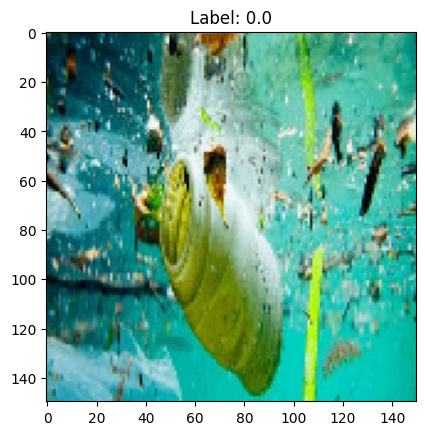

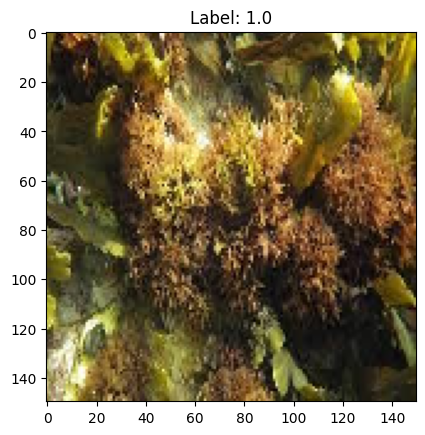

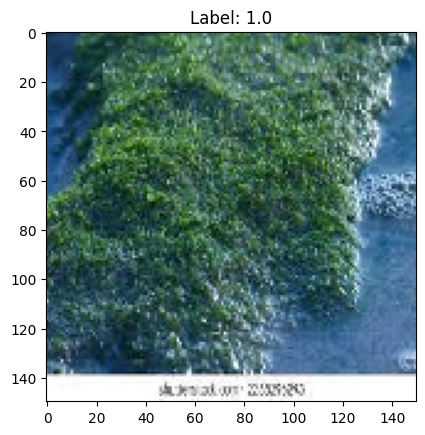

In [130]:
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_generator)
# Plot the images with their labels
for i in range(len(images)):
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.show()
